# Graph demo (PyTorch)

In [1]:
# Get rid of notebook left and right margins
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Requires PyTorch 0.4
import torch
import torchvision.models
from distutils.version import LooseVersion
assert LooseVersion(torch.__version__) >= LooseVersion("0.4")

from ww import builder_pytorch

In [3]:
# Make sure Graphviz has been installed
from graphviz.backend import version
version()

(2, 38, 0)

## VGG 16

In [4]:
# VGG16 with BatchNorm
model = torchvision.models.vgg16_bn()

In [5]:
# Build graph
dg = builder_pytorch.build_pytorch_graph(model, torch.zeros([1, 3, 224, 224]), verbose=True)

kind                      scopeName                                  inputs -> outputs
onnx::Conv                VGG/Sequential[features]/Conv2d[0]         [0, 1, 2] -> [85]
onnx::BatchNormalization  VGG/Sequential[features]/BatchNorm2d[1]    [85, 3, 4, 5, 6] -> [86, 87, 88, 89, 90]
onnx::Relu                VGG/Sequential[features]/ReLU[2]           [86] -> [91]
onnx::Conv                VGG/Sequential[features]/Conv2d[3]         [91, 7, 8] -> [92]
onnx::BatchNormalization  VGG/Sequential[features]/BatchNorm2d[4]    [92, 9, 10, 11, 12] -> [93, 94, 95, 96, 97]
onnx::Relu                VGG/Sequential[features]/ReLU[5]           [93] -> [98]
onnx::MaxPool             VGG/Sequential[features]/MaxPool2d[6]      [98] -> [99]
onnx::Conv                VGG/Sequential[features]/Conv2d[7]         [99, 13, 14] -> [100]
onnx::BatchNormalization  VGG/Sequential[features]/BatchNorm2d[8]    [100, 15, 16, 17, 18] -> [101, 102, 103, 104, 105]
onnx::Relu                VGG/Sequential[features]/ReLU[9]

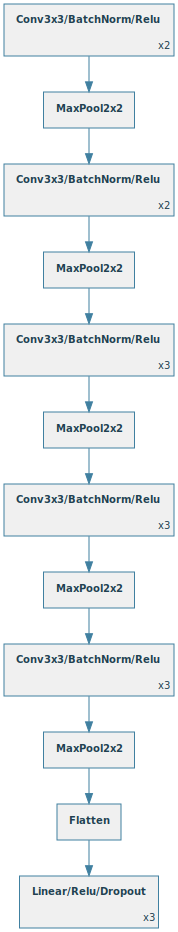

In [6]:
# Draw graph
dg.draw_graph_wip(simplify=True, output_shapes=False, verbose=False)

## ResNet

In [7]:
# Resnet50
model = torchvision.models.resnet50()

In [8]:
# Build graph
dg = builder_pytorch.build_pytorch_graph(model, torch.zeros([1, 3, 224, 224]), verbose=False)

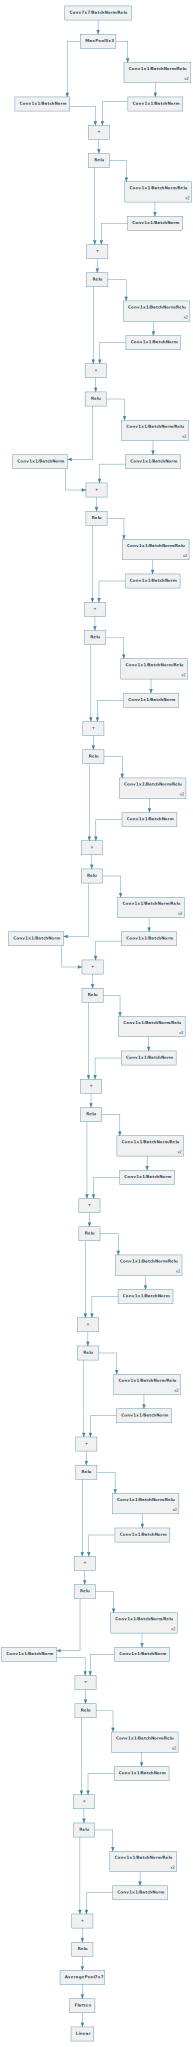

In [9]:
# Draw graph
dg.draw_graph_wip(simplify=True, output_shapes=False, verbose=False)